<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/classification_Decision_tree_and_RandomForest_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Decision Tree Classifier
----------------------------------------

[**Dataset**](https://www.kaggle.com/sid321axn/amazon-alexa-reviews) - Kaggle Amazon Alexa Reviews

## 1. importing library

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## 2. Analyzing Data

In [4]:
data=pd.read_csv('/content/amazon_alexa.tsv',sep='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
data.drop(columns=['date'],inplace=True)
data.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   variation         3150 non-null   object
 2   verified_reviews  3150 non-null   object
 3   feedback          3150 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 98.6+ KB


In [7]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


## 3. Visualizing data

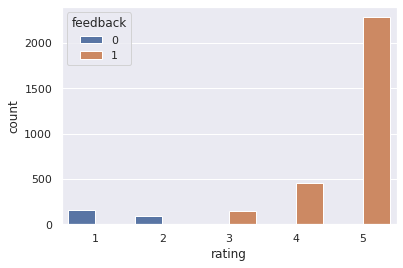

In [8]:
sns.countplot(x='rating',data=data,hue='feedback')

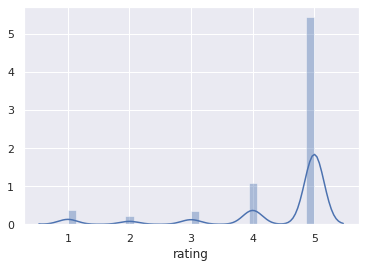

In [9]:
sns.distplot(data['rating'])

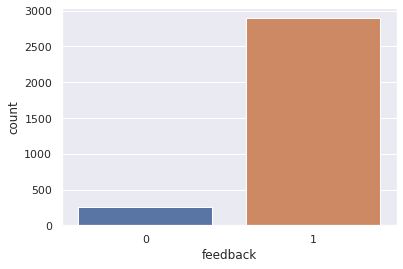

In [10]:
sns.countplot(x='feedback',data=data)

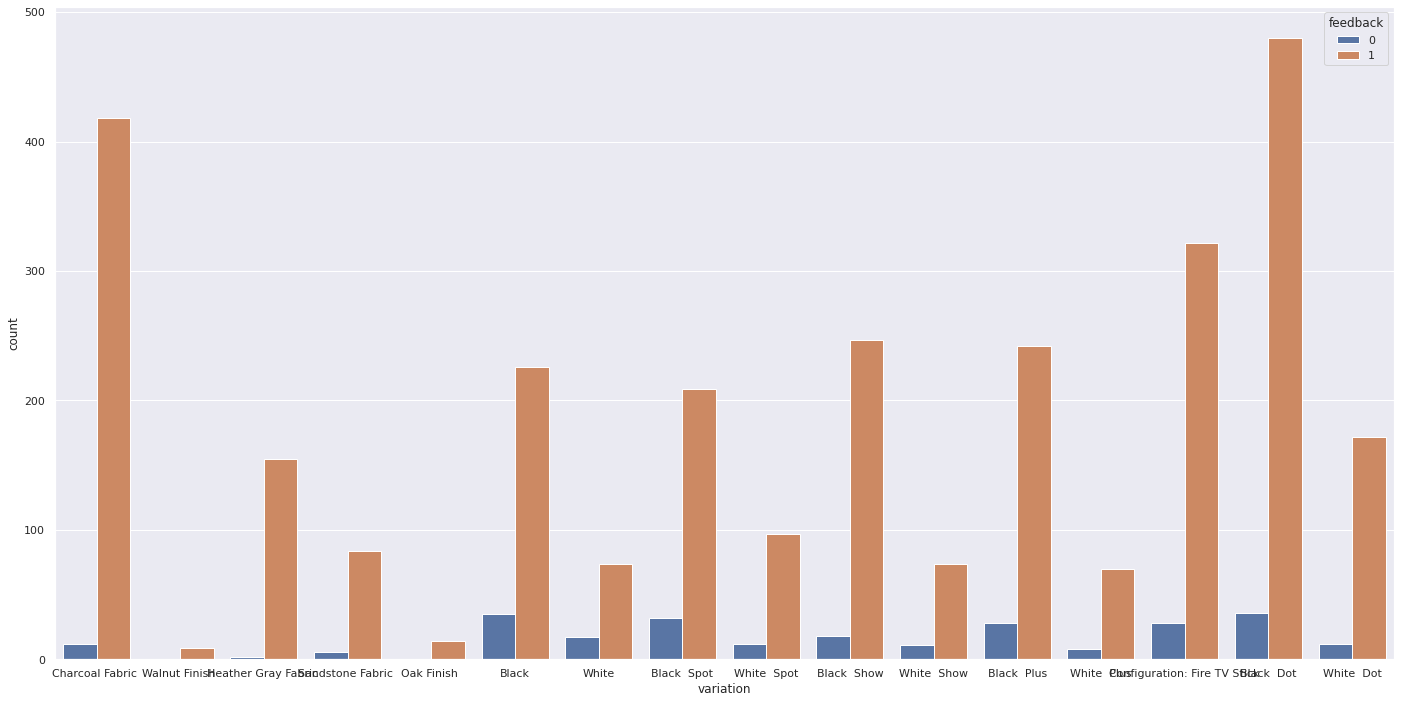

In [11]:
plt.figure(figsize=(24,12))
sns.countplot(x='variation',hue='feedback',data=data)

## Transforming the object columns and making pipeline

In [0]:
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.compose import ColumnTransformer as ct
from sklearn.pipeline import make_pipeline as mp
from sklearn.tree import DecisionTreeClassifier as dtc

In [0]:
## Important: i have passed the columns a string to CV and list of columns to OHE
transformer=ct(transformers=[('review_counts',cv(),'verified_reviews'), 
                             ('variation_dummies', ohe(),['variation'])
                            ],remainder='passthrough')

In [14]:
pipe= mp(transformer,dtc(random_state=42))
pipe

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('review_counts',
                                                  CountVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.int64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max_df=1.0,
        

## 4. Splitting the data for training and testing

In [0]:
from sklearn.model_selection import train_test_split as tts

In [16]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


**Note**
---------------
Now we need to pass the desired column to the ohe as list and strings to cv.
[Reason](https://stackoverflow.com/a/61838828/12210002)

In [17]:
x= data[['rating','variation','verified_reviews']].copy()
y= data.feedback
x.head()

,rating,variation,verified_reviews
0,5,Charcoal Fabric,Love my Echo!
1,5,Charcoal Fabric,Loved it!
2,4,Walnut Finish,"Sometimes while playing a game, you can answer..."
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...
4,5,Charcoal Fabric,Music


In [0]:
x_train,x_test,y_train,y_test= tts(x,y,test_size=0.3,random_state=42,stratify=y)

In [19]:
x_train.shape,y_train.shape

((2205, 3), (2205,))

## 5. Training the model

In [20]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('review_counts',
                                                  CountVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.int64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max_df=1.0,
        

## 6. Testing the model

In [0]:
pred=pipe.predict(x_test)

## 7. Evaluating the model


In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
accuracy_score(y_test,pred)                 #Accuracy of 100%

1.0

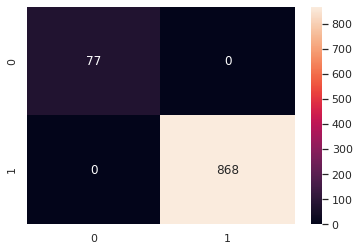

In [24]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.0f')

**Note**

As we are achieveing the 100% Accuracy, Thus we are not tuning the hyperparameters.


# 2. Using RandomForestClassifier
----------------------------------------------

## 1. Training the model


In [0]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [0]:
pipe= mp(transformer, rfc(n_estimators=150, random_state=42))

In [27]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('review_counts',
                                                  CountVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.int64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max_df=1.0,
        

In [0]:
pred=pipe.predict(x_test)

## 2. Testing the model

In [29]:
accuracy_score(y_test,pred)  # 99% accuracy

0.9968253968253968

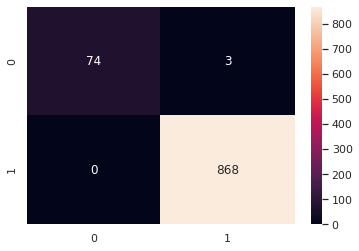

In [32]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.0f')

## Note
--------------

We are able to achieve the accuracy of **100% in decision tree classifier** and **99% in random forest classifier**.

Refer : [Notebook-1   ](https://www.kaggle.com/chitralc1/amazon-alexa-review-analysis/notebook) [ColumnTransformer](https://towardsdatascience.com/columntransformer-meets-natural-language-processing-da1f116dd69f)  

[Notebook-2](https://www.kaggle.com/roshansharma/amazon-alexa-reviews)